Note: the project notebook is based on the tutorial of Yolov3 found on YouTube:

[Yolov3 Reference Video](https://www.youtube.com/watch?v=10joRJt39Ns)

### Step 1: *Enabling* GPU within notebook
We need to enable GPU acceleration within your Colab notebook so that your YOLOv3 system will be able to process detections over 100 faster than CPU.

### Steps:

### i) Click **Edit** at top left of your notebook
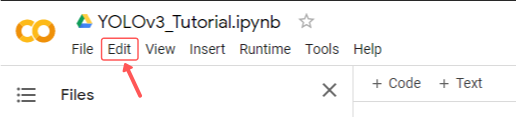
### ii) Click **Notebook Settings** within dropdown
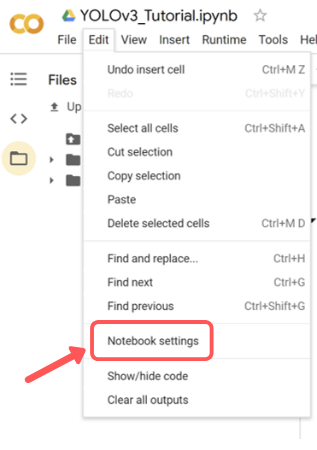
### iii) Under 'Hardware Accelerator' select **GPU** and then hit **Save**
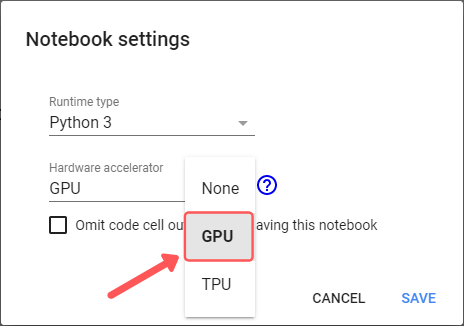



# Step 2: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [ ]:
# make darknet (build)
!make

# Step 3: Gathering and Labeling a Custom Dataset

The goal is to transform the label text from the original file 
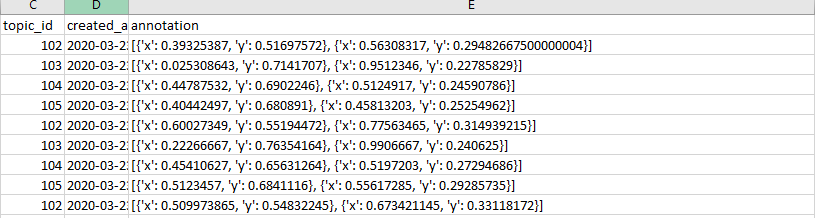




To something siilar to the following format:

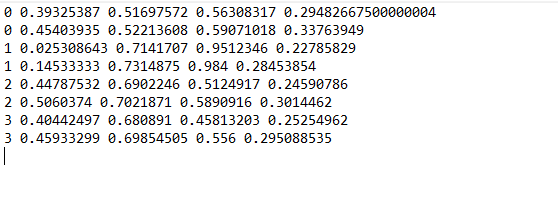

The label file is created for each of the image files. Hence, the image folder would look something like this:

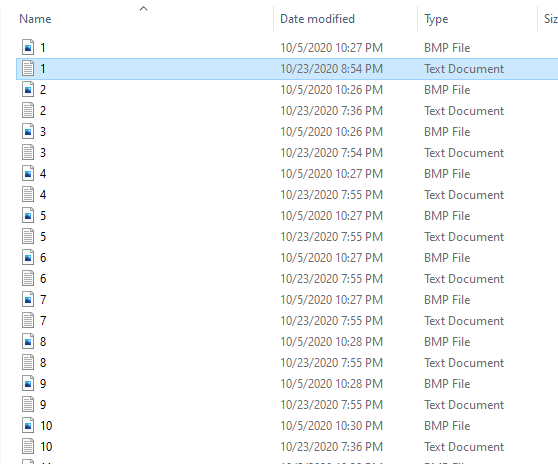

# Step 4: Creating obj.names, obj.data and custom configuration files

We need to create obj.names file in the following format:

Eye <br>
Pupil <br>
Front Slit <br>
Back Slit <br>


We need to create obj.data file in the following format:

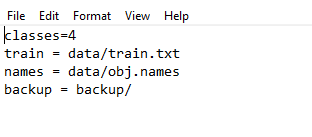

We need to create configuration file in the following format:

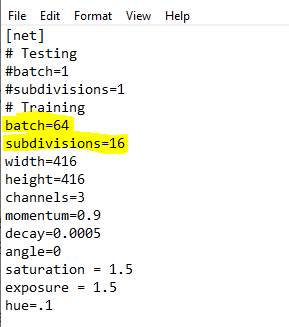

Note: Change batch = 64 and subdivisions = 16

Also, the following:

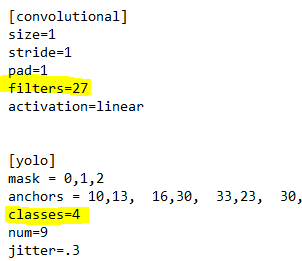

Note: Change class = 4 ( we have 4 classes: Eye, Pupil, Front Slit and Back Slit) and filter = 27, (# of classes + 5) * 3 only for the convolutional block right above "yolo" block.

# Step 5: Configure obj.names, obj.data, custom configuration file and generate train.txt

1. Obj.names and obj.data should were placed in darknet/data/ folder.

2. Custom configuration file (i.e., yolov3_custom.cfg) was placed in
   darkent/cfg/ folder.

3. We should also generate a "train.txt" file and place it in darknet/data/  
   folder. The "train.txt" file looks something like the following ( assuming all images files are stored in darknet/data/obj/ folder):

   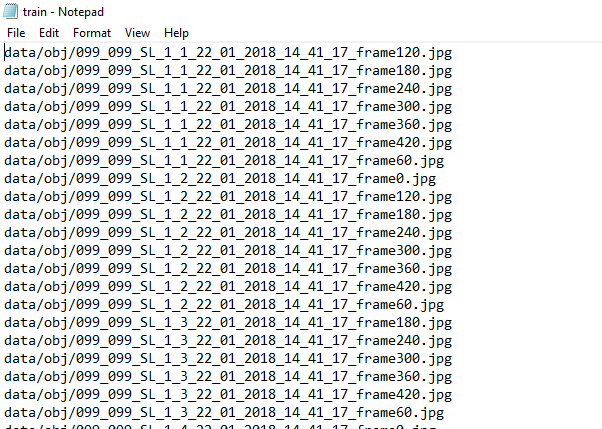


We used the following code to automatically generate the "train.txt" file

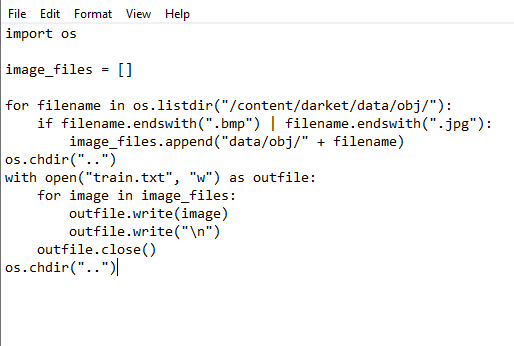

# Step 6: Define Custom Helper Functions and Train Image Detector with Darknet

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

In [ ]:
imShow('chart.png')

# Step 7: Run Custom Object Detector

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

In [ ]:
import os

# Assuming current directory is now at darket
file_directory = "/img/obj/"

for filename in file_directory:
  # assuming all images which need to be processed by the detector are located in darknet/images/ folder
  !./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /images/$filename -thresh 0.3
  imShow('predictions.jpg')

  # move the predicted result to darknet/prediction/ folder
  !cp predictions.jpg /prediction/$filename

At this point, we should prediction result for each of the original images. Example:

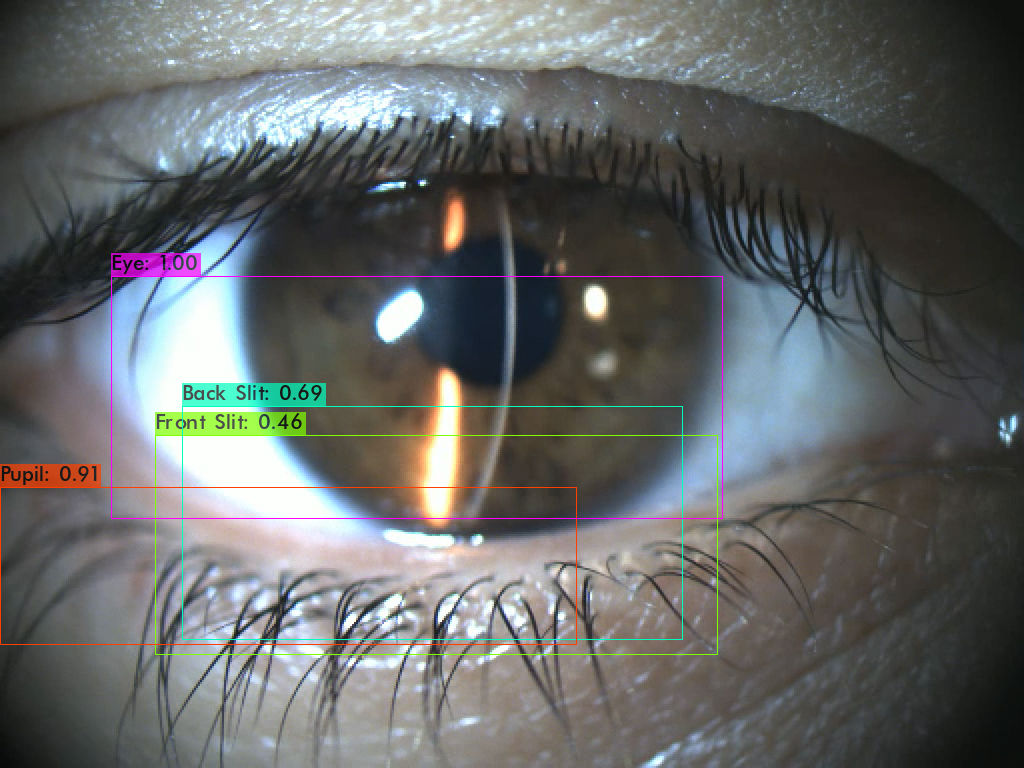